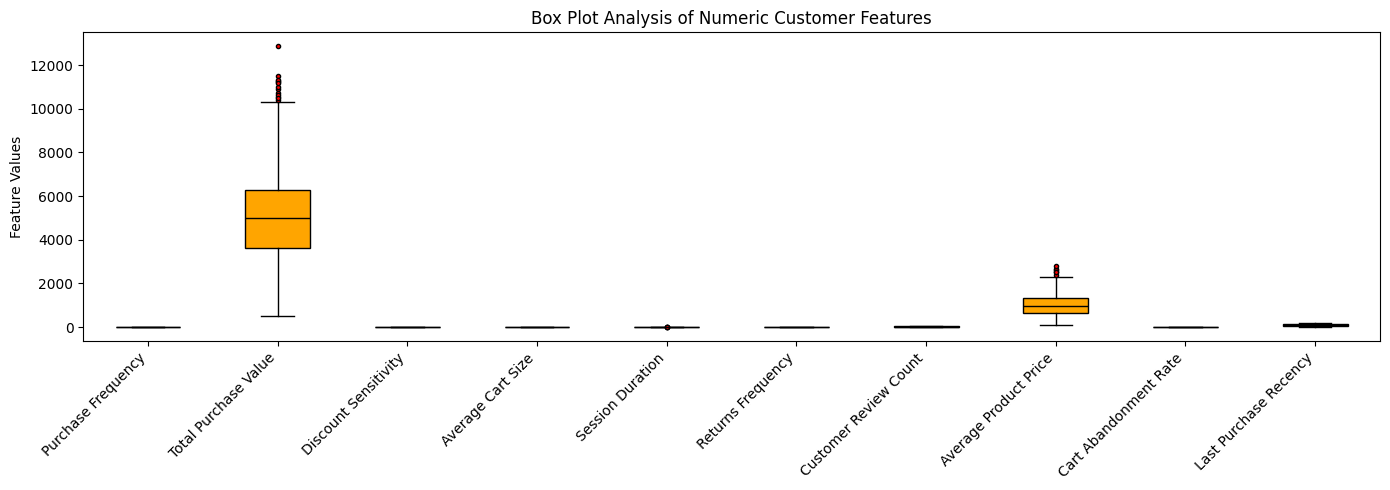

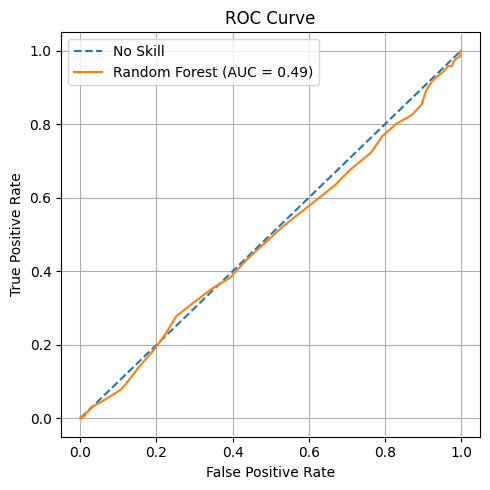

AUC Score: 0.4858066716121467


In [4]:
# ============================================================
# CUSTOMER PURCHASE LIKELIHOOD – FULL MODEL EVALUATION CODE
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("ML470_S5_RetailSales_Data_Practice.csv")

X = df.drop("Purchase Likelihood", axis=1)
y = df["Purchase Likelihood"]

# -------------------------------
# BOX PLOT (Reduced Size)
# -------------------------------
X_numeric = X.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 5))  # 👈 reduced size

plt.boxplot(
    X_numeric.values,
    patch_artist=True,
    boxprops=dict(facecolor='orange', color='black'),
    medianprops=dict(color='black'),
    flierprops=dict(marker='o', markerfacecolor='red', markersize=3)
)

plt.xticks(
    range(1, len(X_numeric.columns) + 1),
    X_numeric.columns,
    rotation=45,
    ha='right'
)

plt.title("Box Plot Analysis of Numeric Customer Features")
plt.ylabel("Feature Values")
plt.tight_layout()
plt.show()

# -------------------------------
# Encode Categorical Columns
# -------------------------------
cat_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# Train Random Forest
# -------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -------------------------------
# ROC Curve (Reduced Size)
# -------------------------------
y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

fpr_ns, tpr_ns, _ = roc_curve(y_test, np.zeros(len(y_test)))

plt.figure(figsize=(5, 5))  # 👈 reduced size

plt.plot(fpr_ns, tpr_ns, '--', label='No Skill')
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("AUC Score:", roc_auc)
